In [9]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install scipy
# !pip install seaborn
# !pip install statsmodels
# !pip install openpyxl

In [10]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_excel('CompData-1.xlsx')
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [12]:
df.shape

(2058, 58)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
_Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
_Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
_Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
_Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
_Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
_Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
_Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


In [16]:
df.isna().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [17]:
df1=df[df.isna().sum(axis=1)<=1]

In [18]:
df1.shape

(2047, 58)

In [19]:
df.size

119364

In [20]:
(df.isna().sum().sum()/df.size)*100

0.249656512851446

In [21]:
df['Default'].value_counts(normalize=True)

Default
0    0.8931
1    0.1069
Name: proportion, dtype: float64

In [22]:
df.columns

Index(['Co_Code', 'Co_Name', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_pers

In [23]:
X = df.drop(['Default','Co_Code','Co_Name'], axis = 1)
y = df['Default'] 

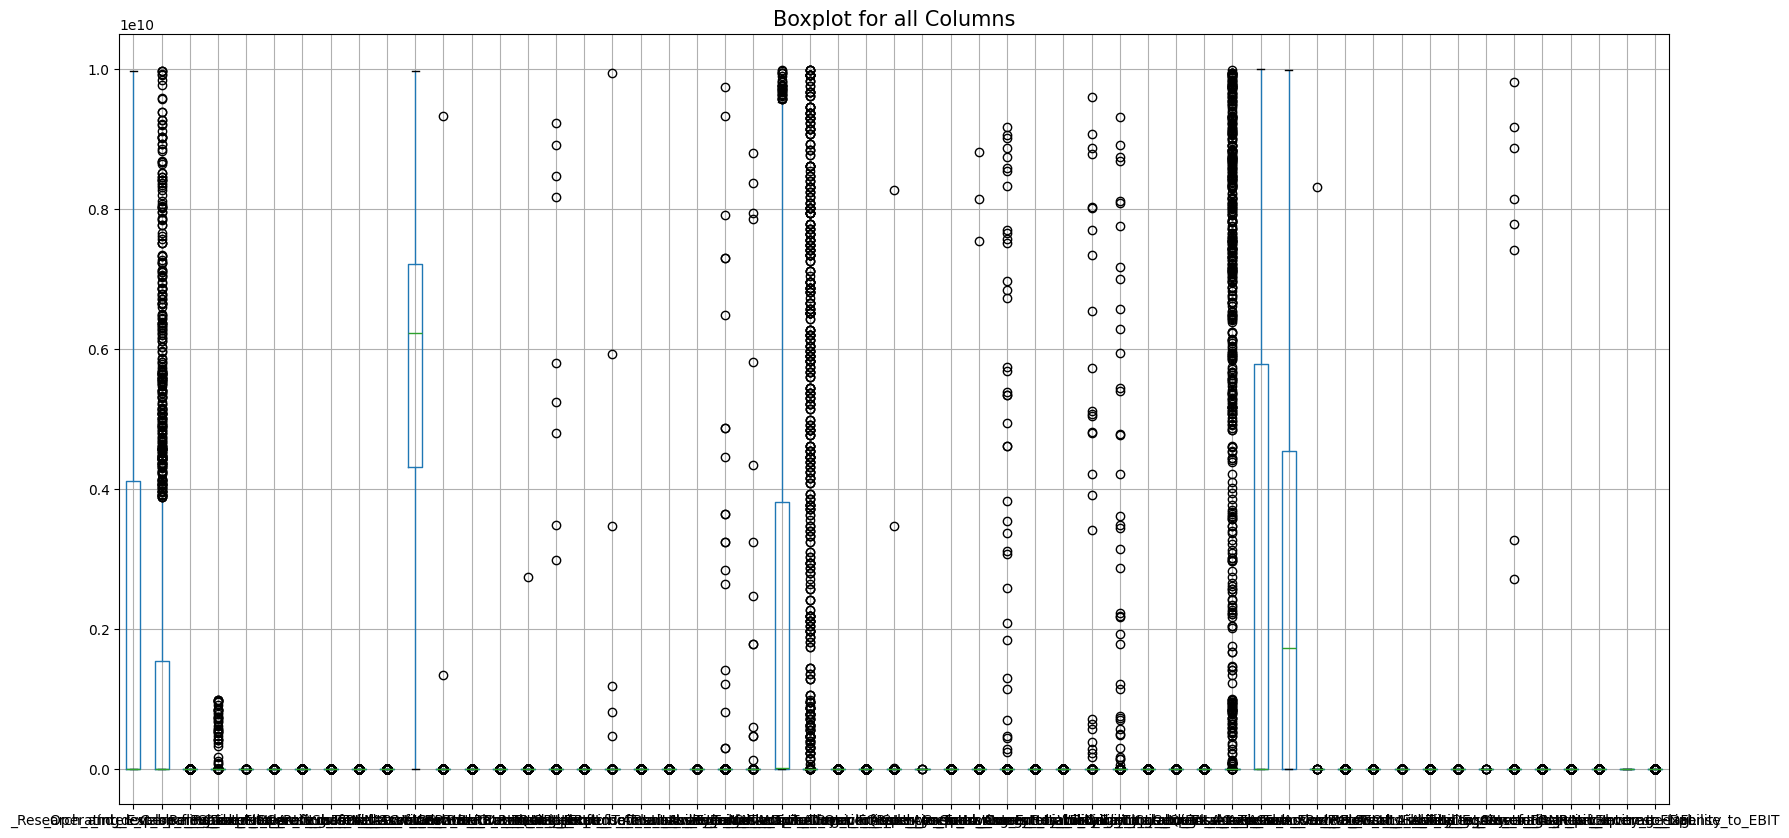

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot for all Columns",fontsize=15)

X.boxplot();

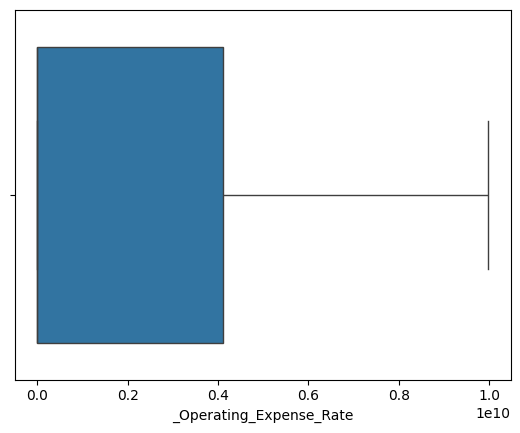

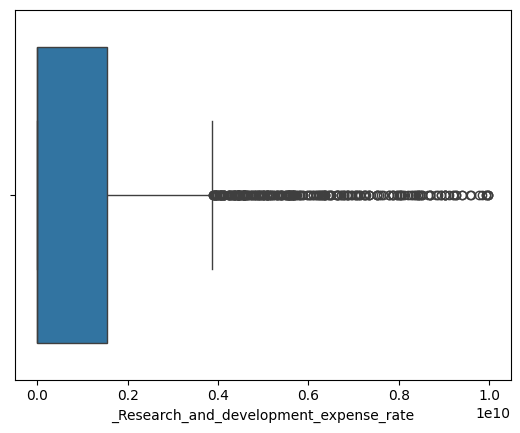

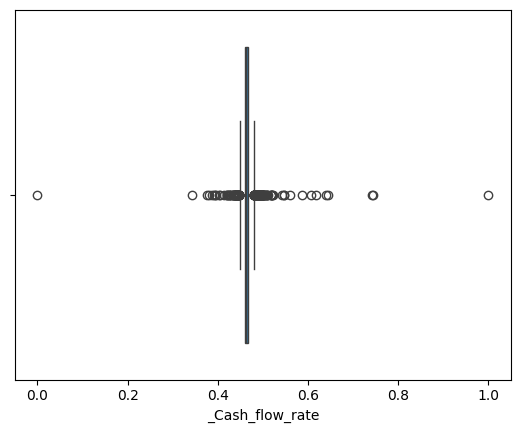

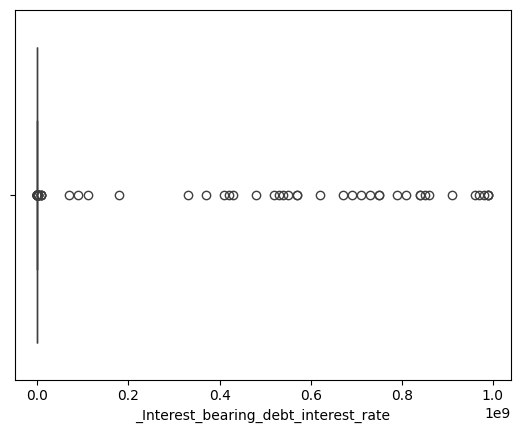

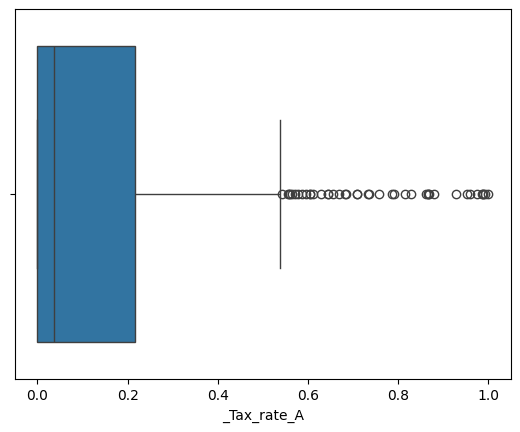

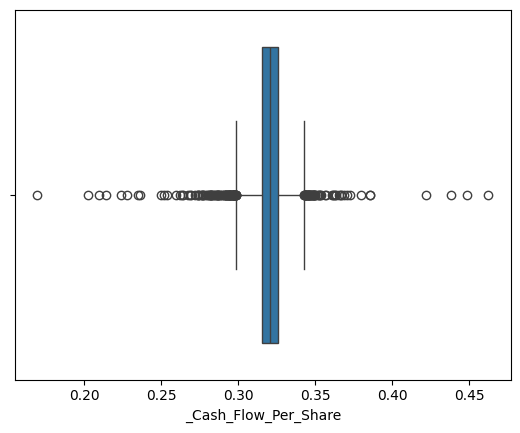

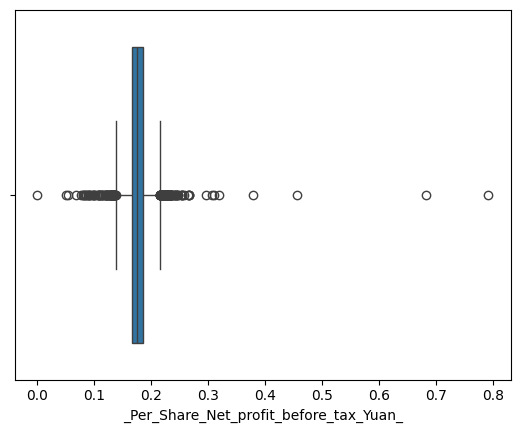

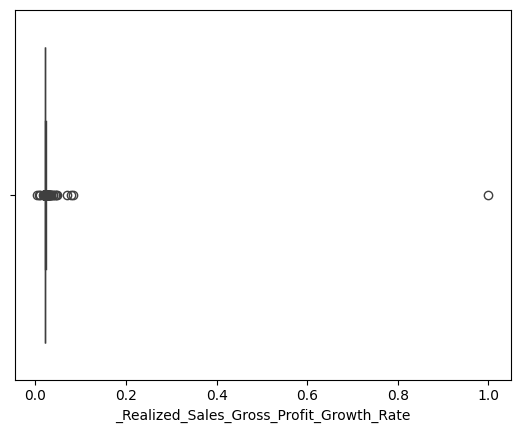

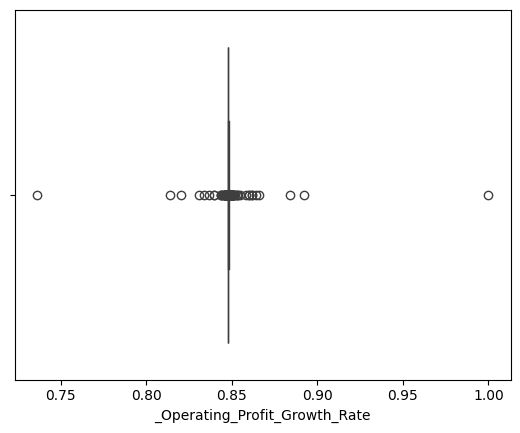

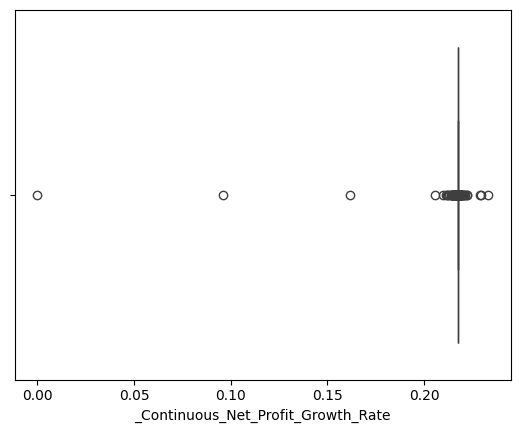

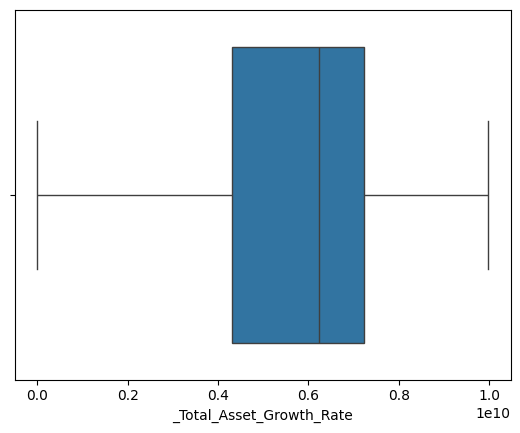

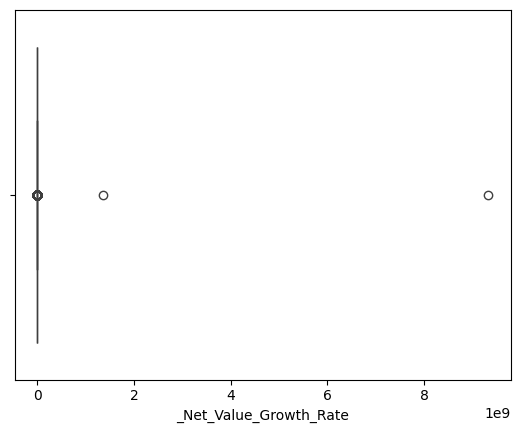

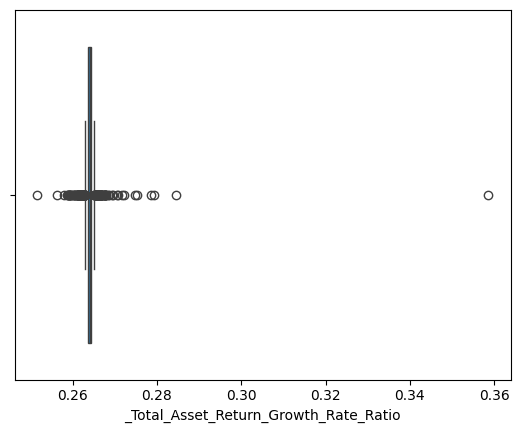

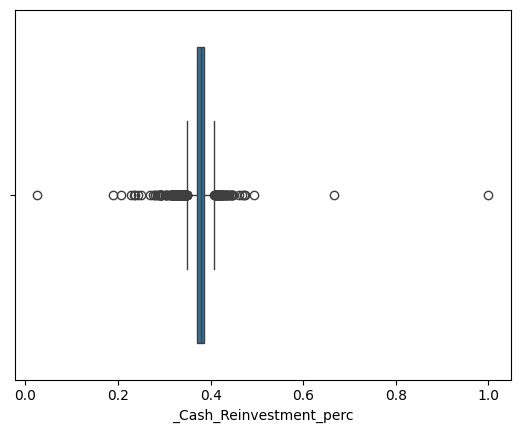

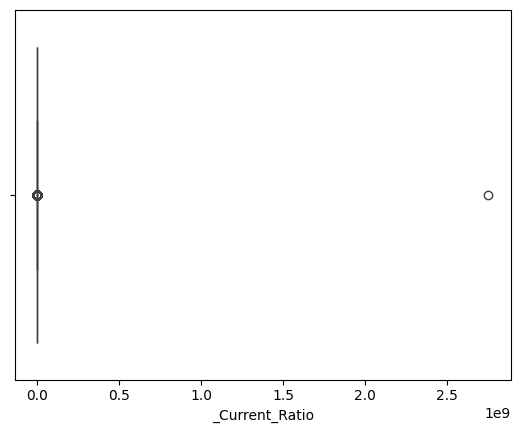

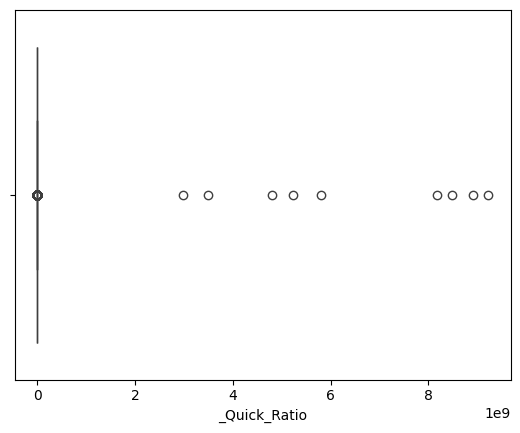

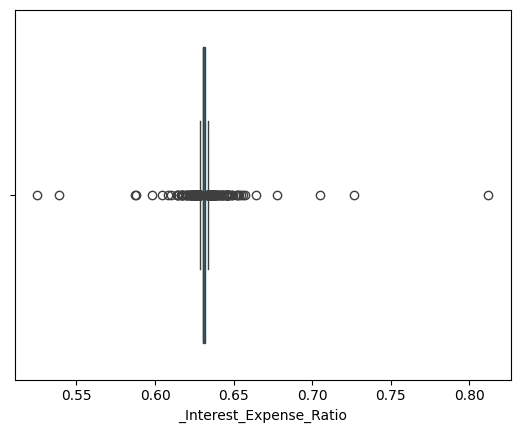

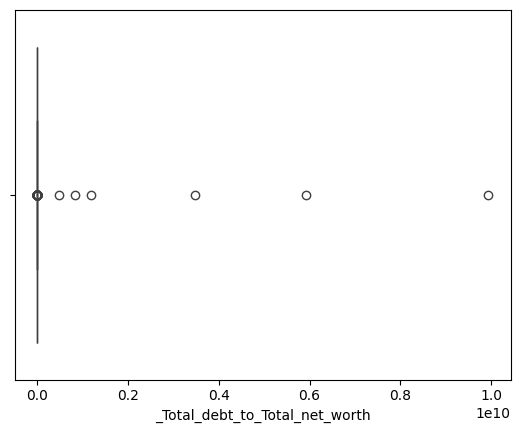

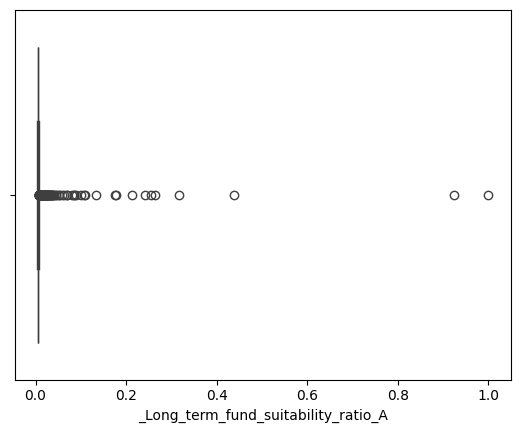

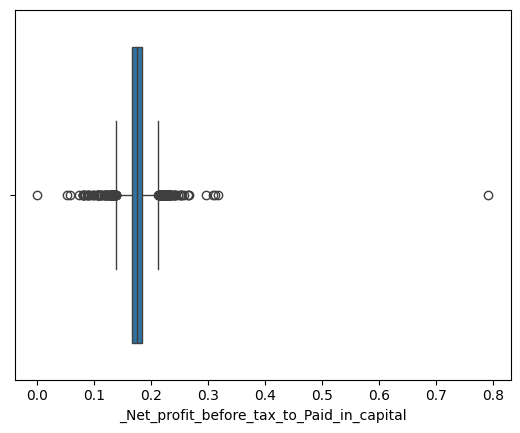

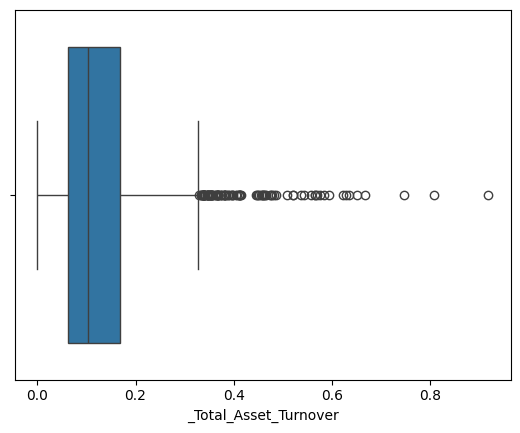

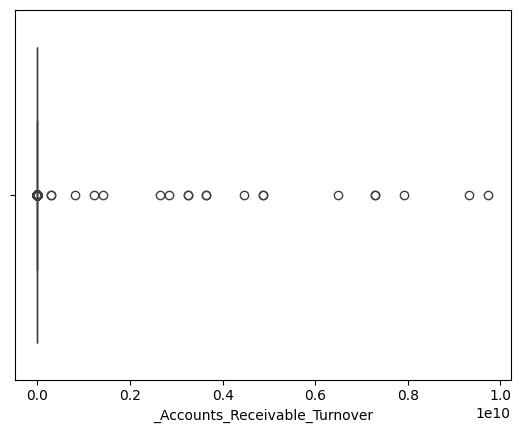

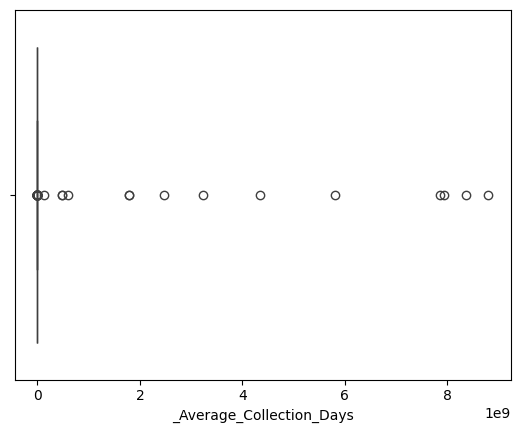

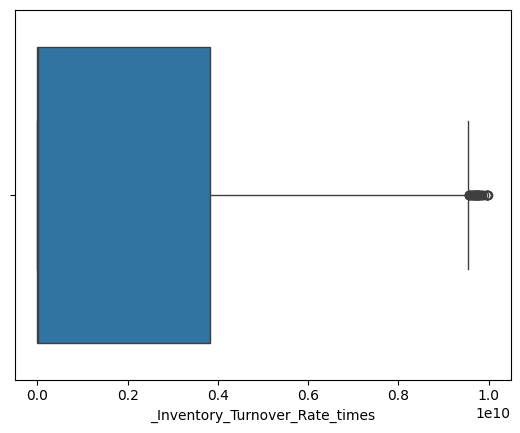

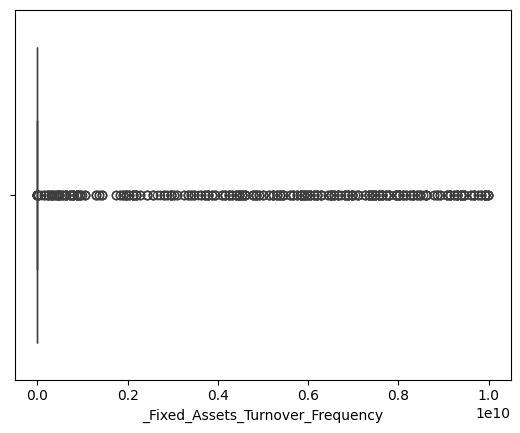

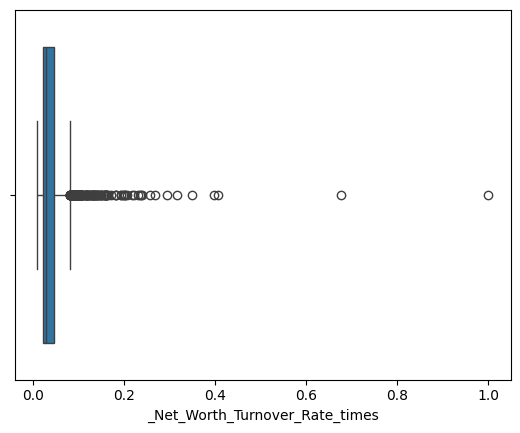

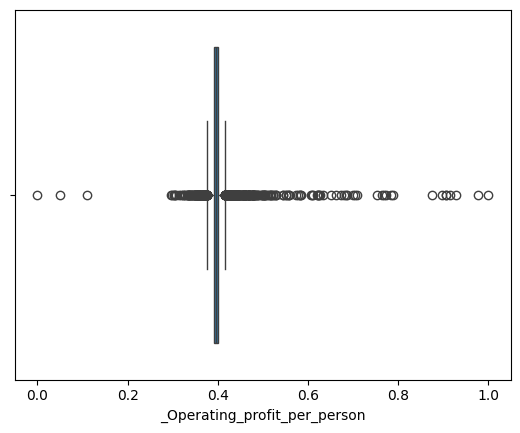

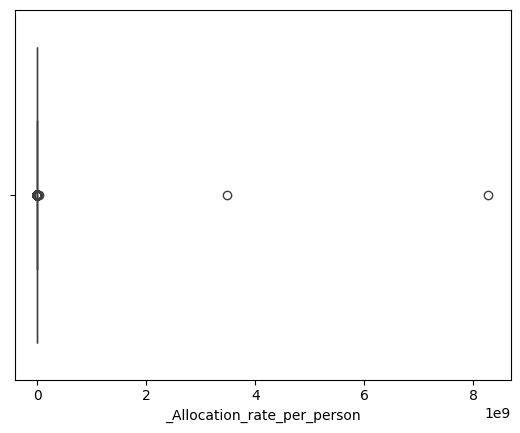

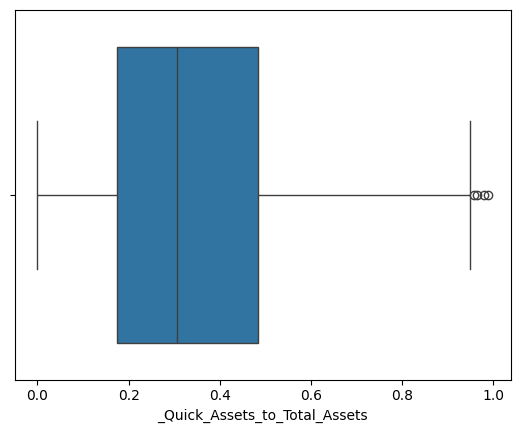

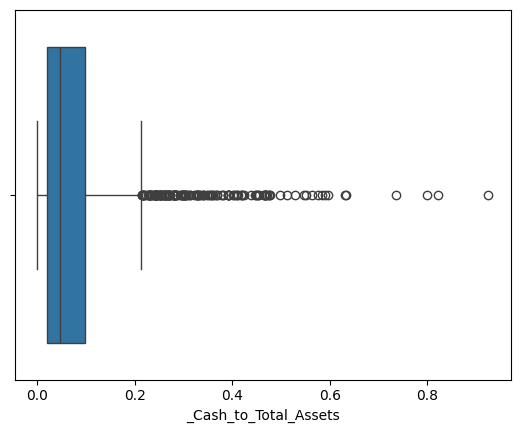

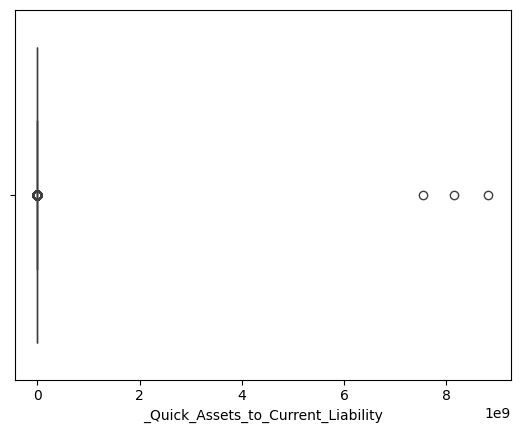

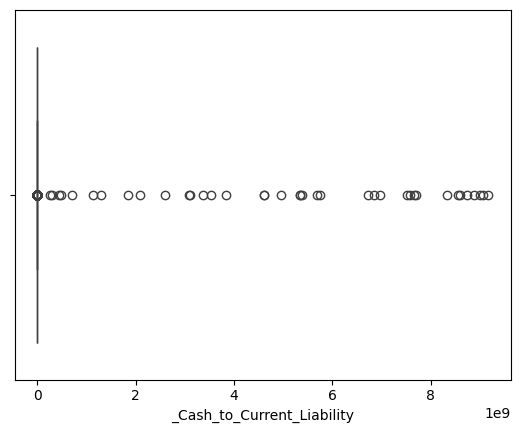

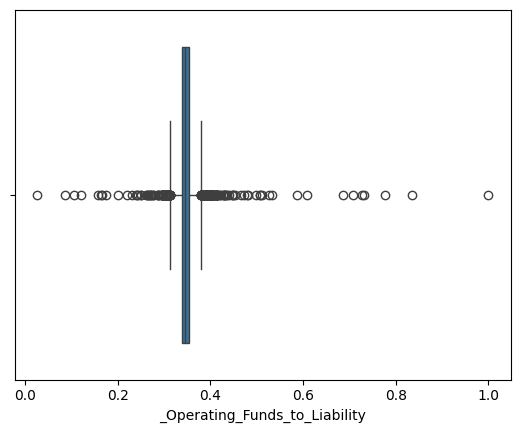

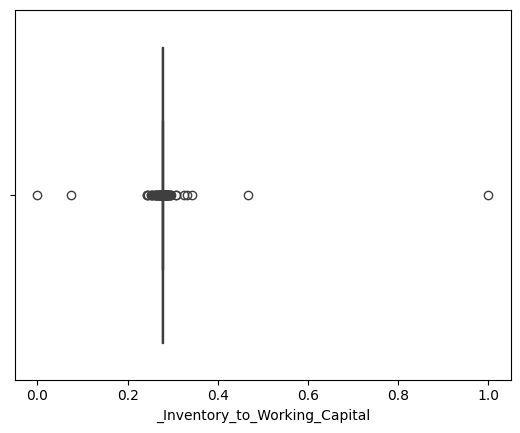

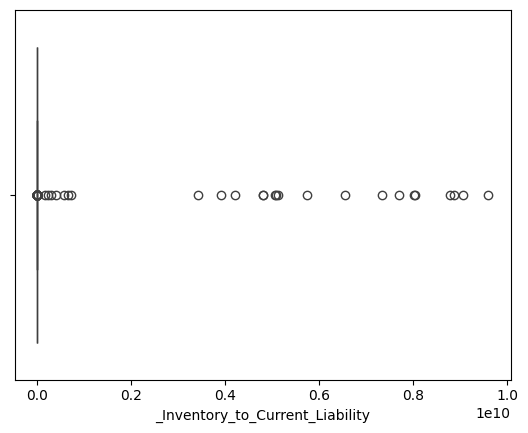

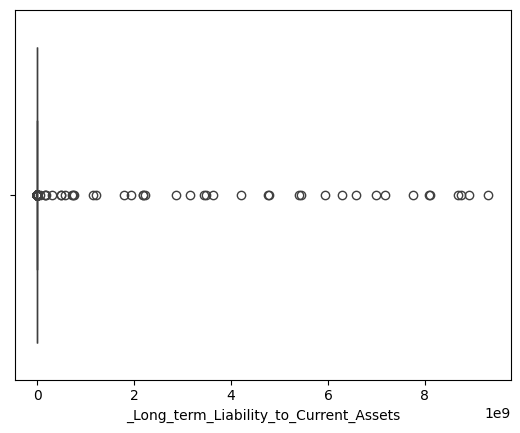

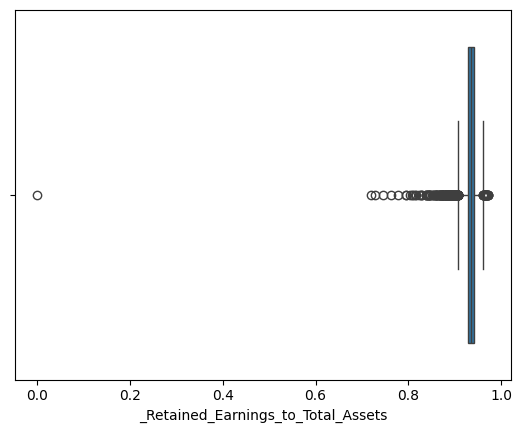

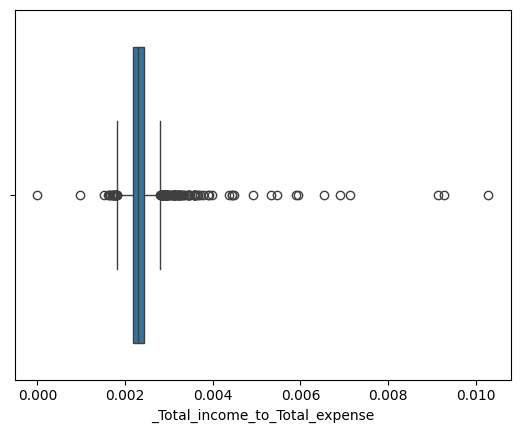

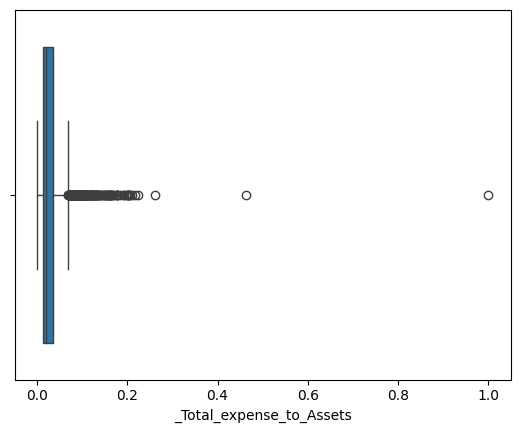

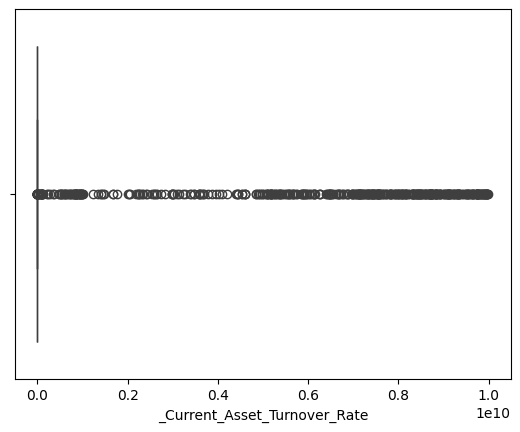

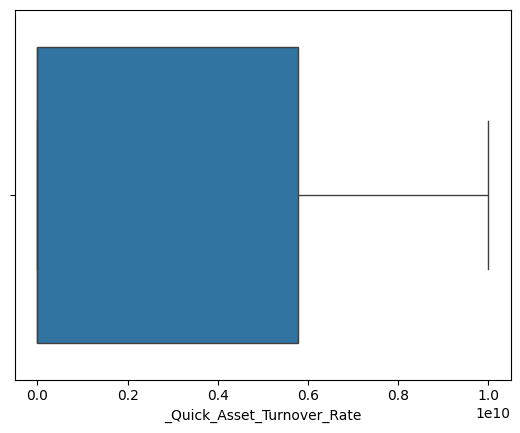

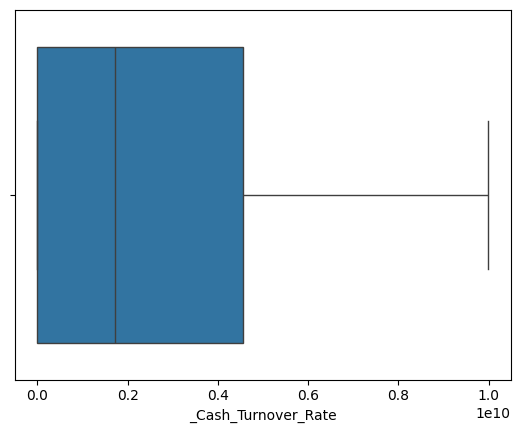

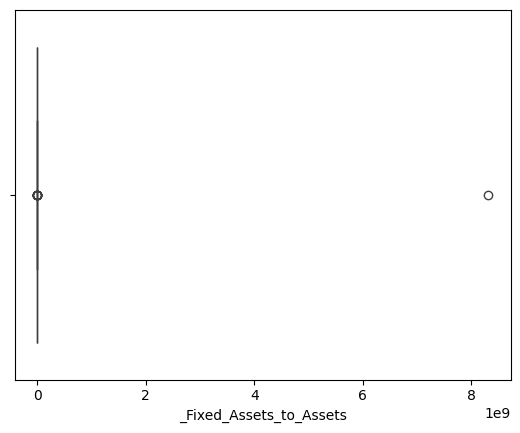

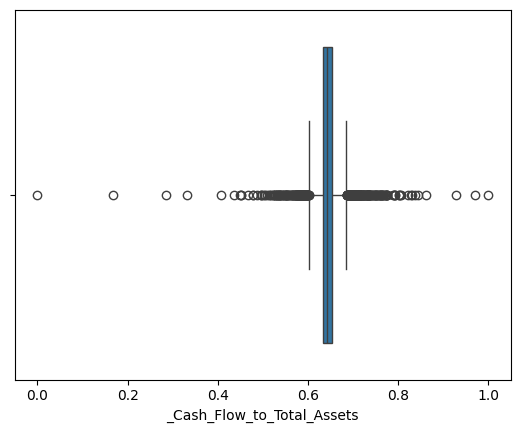

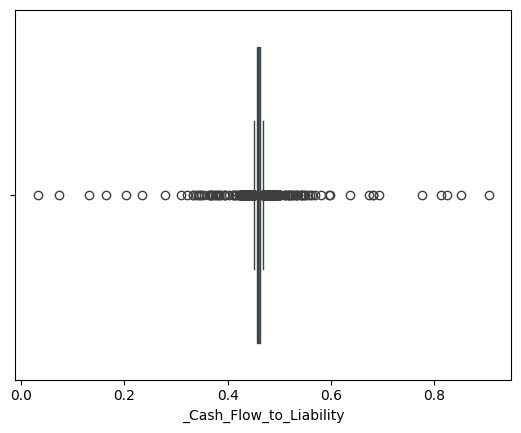

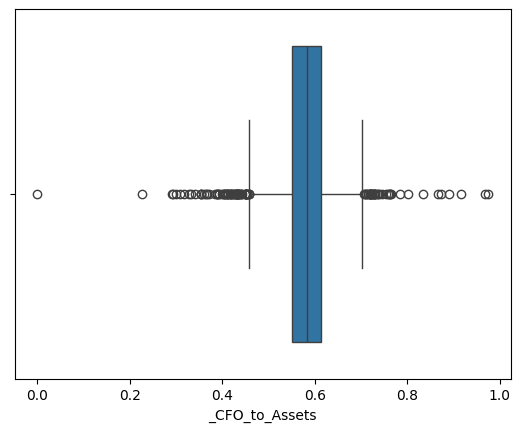

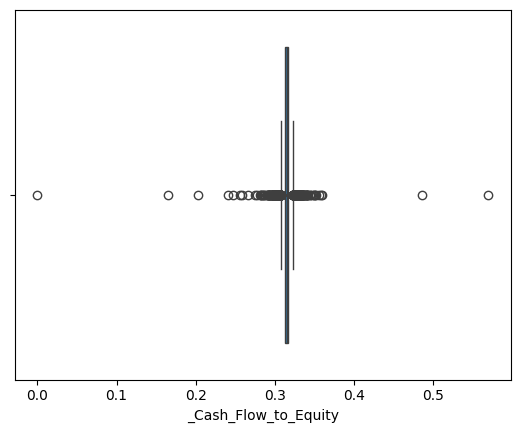

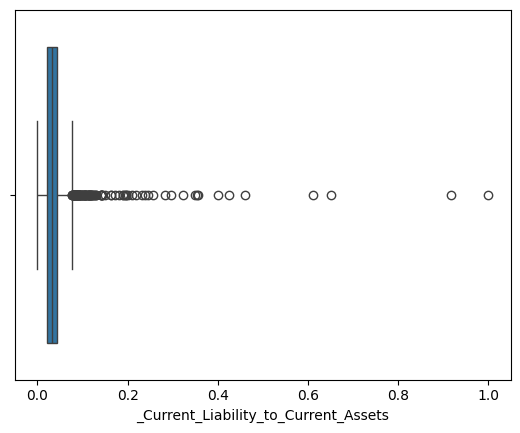

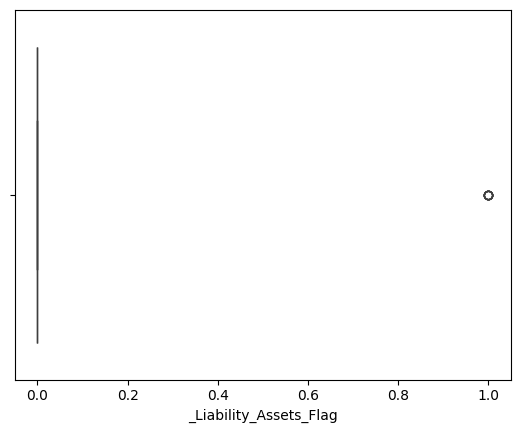

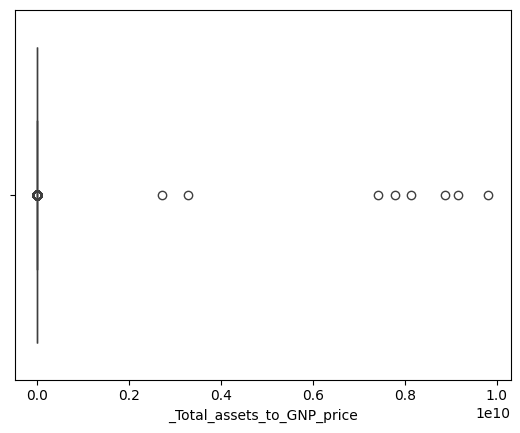

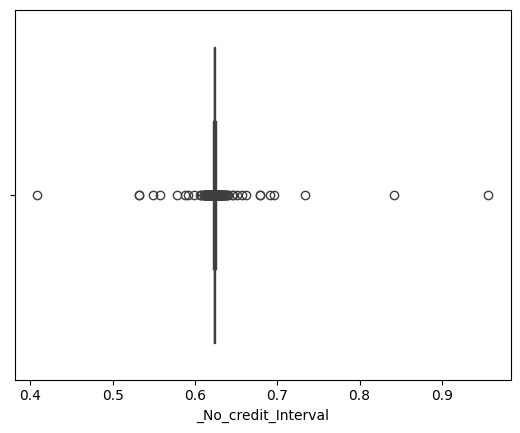

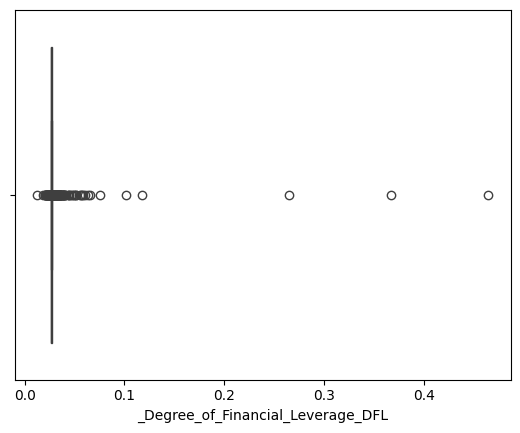

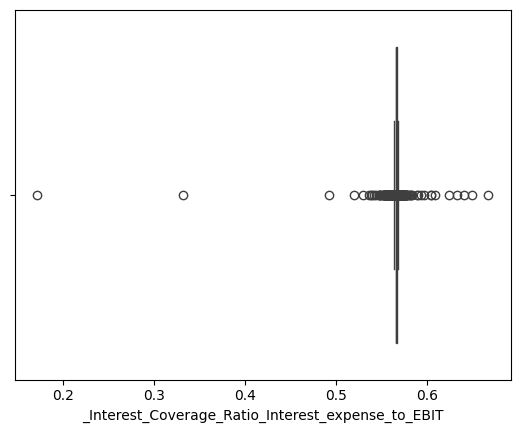

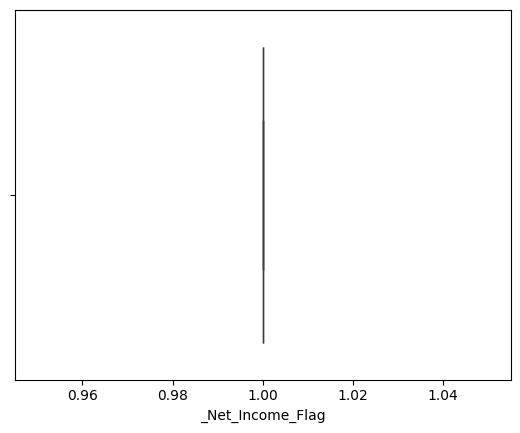

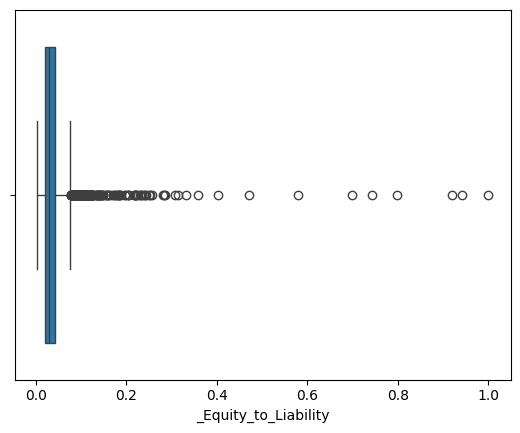

In [25]:
for col in X.columns:
    sns.boxplot(x = X[col])
    plt.show()


In [26]:

Q1= X.quantile(0.25)
Q3= X.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [27]:
((X> UL)| (X< LL)).sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 146
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

In [28]:
((X> UL)| (X< LL)).sum().sum()

10864

In [29]:
X[((X> UL)| (X< LL))]=np.nan

In [30]:
X.isna().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 313
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

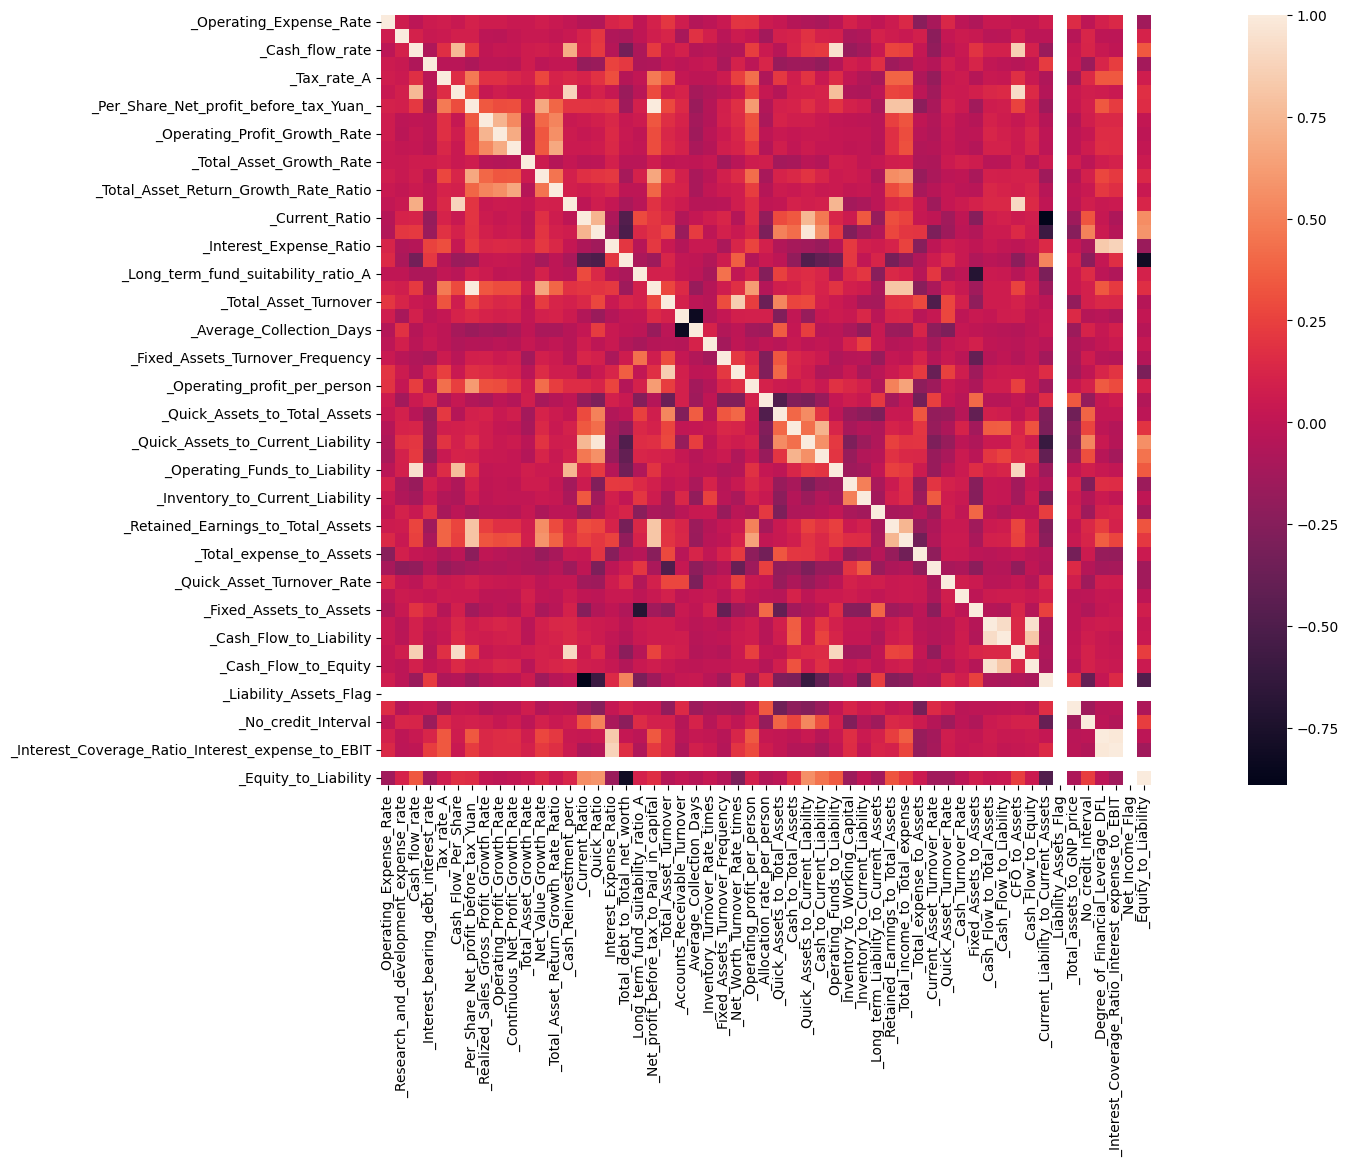

In [31]:
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(),annot=False,square=True);

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [33]:
scaled_predictors.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,2.081168,-0.516860,-0.308453,-0.381617,-0.827491,0.214266,1.264019,-0.336136,-0.173342,-0.249595,...,-0.122180,-1.311543,0.191528,0.0,NaN,NaN,0.480066,0.261839,0.0,-1.062182
1,2.253378,NaN,-0.641492,1.067984,-0.839204,-0.650263,-1.002647,NaN,NaN,NaN,...,-0.671677,0.000709,0.638247,0.0,0.784135,-2.554392,NaN,NaN,0.0,-0.080368
2,0.537423,0.327609,-2.406308,0.191853,-0.839204,-2.574817,-0.248825,1.345182,1.610975,-0.797439,...,-2.589857,0.073774,0.101821,0.0,-0.663251,-0.034903,2.463565,1.507954,0.0,0.773827
3,1.349273,-0.516860,-0.190007,0.574162,-0.762232,-0.120251,-0.098060,NaN,NaN,2.038620,...,-0.114746,0.859157,-1.027225,0.0,0.090555,-1.638602,0.811180,0.517715,0.0,-0.253590
4,0.500521,-0.516860,-0.123400,1.330821,2.468920,0.527060,0.026710,-0.366632,-0.522386,-0.290186,...,0.250024,1.128876,0.163944,0.0,0.898818,1.329212,NaN,2.048261,0.0,-0.744648


In [34]:
df_scaled=pd.concat([scaled_predictors,y],axis=1)

In [35]:
df_scaled.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,2.081168,-0.516860,-0.308453,-0.381617,-0.827491,0.214266,1.264019,-0.336136,-0.173342,-0.249595,...,-1.311543,0.191528,0.0,NaN,NaN,0.480066,0.261839,0.0,-1.062182,0
1,2.253378,NaN,-0.641492,1.067984,-0.839204,-0.650263,-1.002647,NaN,NaN,NaN,...,0.000709,0.638247,0.0,0.784135,-2.554392,NaN,NaN,0.0,-0.080368,1
2,0.537423,0.327609,-2.406308,0.191853,-0.839204,-2.574817,-0.248825,1.345182,1.610975,-0.797439,...,0.073774,0.101821,0.0,-0.663251,-0.034903,2.463565,1.507954,0.0,0.773827,0
3,1.349273,-0.516860,-0.190007,0.574162,-0.762232,-0.120251,-0.098060,NaN,NaN,2.038620,...,0.859157,-1.027225,0.0,0.090555,-1.638602,0.811180,0.517715,0.0,-0.253590,0
4,0.500521,-0.516860,-0.123400,1.330821,2.468920,0.527060,0.026710,-0.366632,-0.522386,-0.290186,...,1.128876,0.163944,0.0,0.898818,1.329212,NaN,2.048261,0.0,-0.744648,0


In [36]:
# Split X and y into training and test set in 67:33 ratio & random_state=42
from sklearn.model_selection import train_test_split
Train, Test= train_test_split(df_scaled, test_size=0.33 , random_state=42,stratify=df_scaled.Default)

In [37]:
# IMPUTING THE MISSING VALUES
from sklearn.impute import KNNImputer

In [38]:
imputer = KNNImputer(n_neighbors=5)

In [39]:
Company_imputed_Train=pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
Company_imputed_Test=pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [40]:
Company_imputed_Train.isna().sum().sum()

0

In [41]:
Company_imputed_Train.shape

(1378, 56)

In [42]:
Company_imputed_Test.isna().sum().sum()

0

In [43]:
Company_imputed_Train.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,-0.631148,-0.516860,-0.412883,2.187043,-0.839204,1.912913,-1.626500,-0.878136,-0.505989,-1.054690,...,0.029949,-0.874801,0.0,-0.588075,-0.729757,-0.490283,-0.653947,0.0,0.395720,0.0
1,-0.631148,1.296418,0.430603,-0.819683,1.769478,0.243807,1.180838,-0.475179,-0.442214,-0.499808,...,-1.640419,-0.222950,0.0,-0.430155,0.042010,-0.221228,-0.371063,0.0,-0.012214,0.0
2,-0.631148,-0.516860,-0.824229,1.008246,-0.839204,-0.732806,-0.332005,-1.322228,-1.192817,-2.229444,...,1.337954,0.522964,0.0,2.837931,-0.226368,-0.380864,0.229899,0.0,-0.551727,0.0
3,1.201664,2.456916,-0.221863,-0.692247,-0.839204,0.005736,-0.659528,-0.610211,-0.796517,-2.014963,...,0.018565,-0.077514,0.0,1.744715,0.563925,-1.945138,-0.539288,0.0,-0.631197,0.0
4,-0.631148,0.169077,-0.564459,0.474604,-0.839204,-0.550343,-0.794696,-0.906267,-1.466592,-0.592156,...,-0.074994,0.458358,0.0,1.076877,-0.819349,-0.393150,0.929634,0.0,-0.283694,0.0


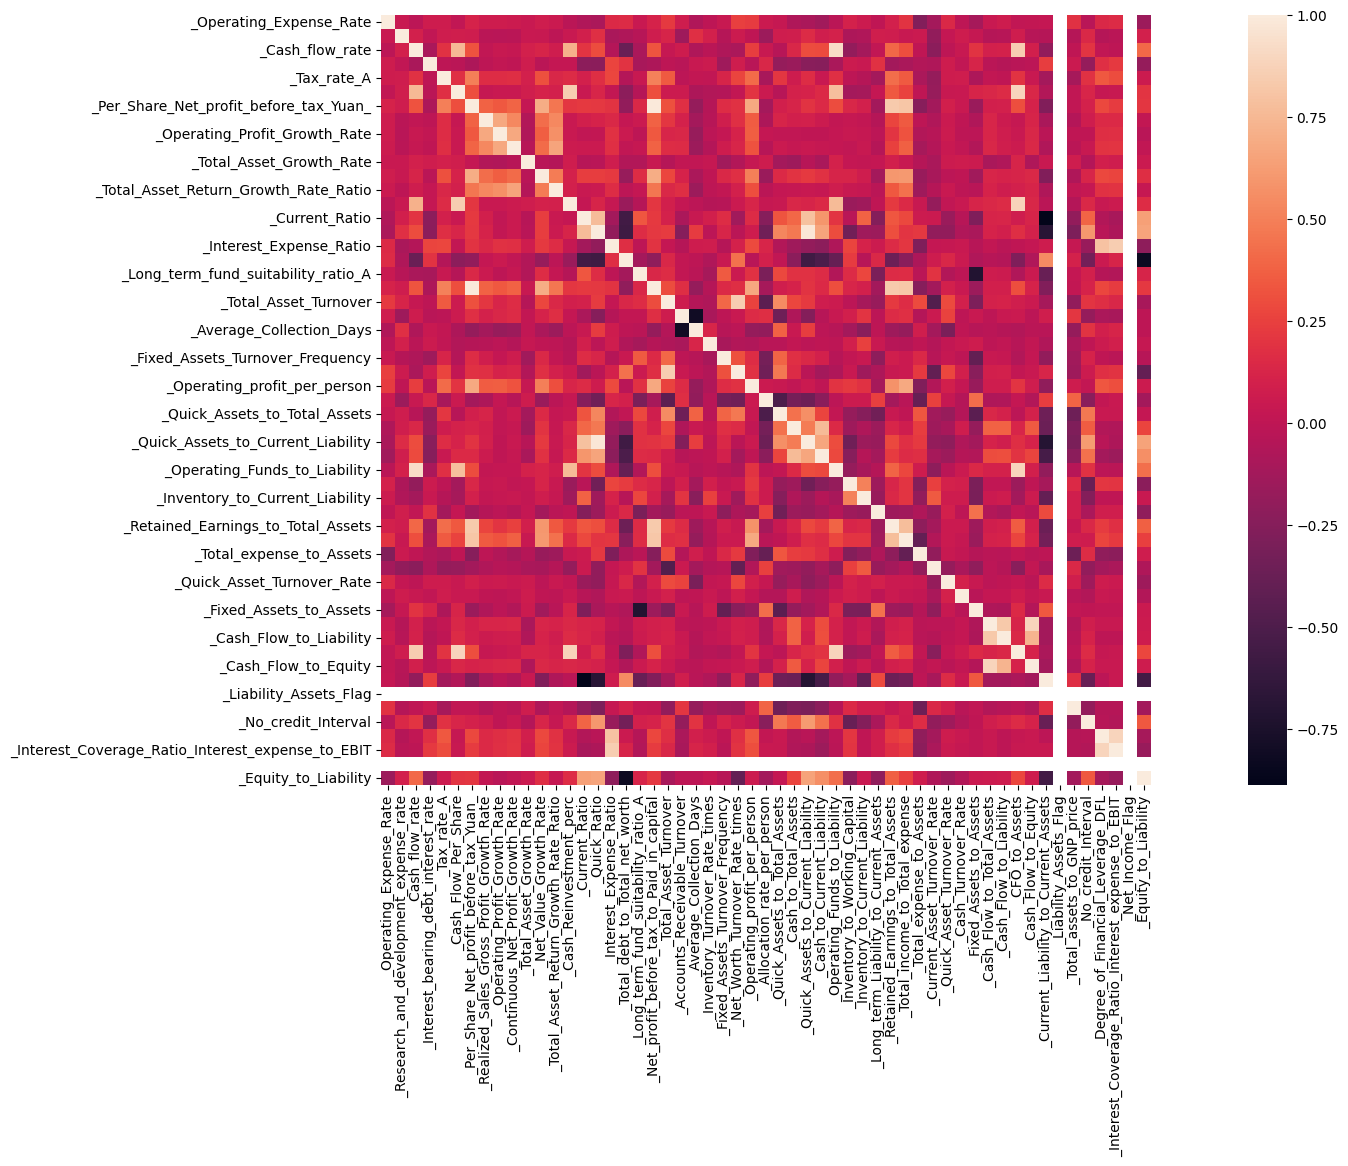

In [44]:
plt.figure(figsize=(25,10))
sns.heatmap(Company_imputed_Train.drop('Default',axis=1).corr(),annot=False,square=True);

In [45]:
X_train= Company_imputed_Train.drop('Default',axis=1)
y_train=Company_imputed_Train['Default']
X_test= Company_imputed_Test.drop('Default',axis=1)
y_test=Company_imputed_Test['Default']


In [46]:
X_train.shape

(1378, 55)

In [47]:
#Model building
import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def cal_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [49]:
cal_vif(X_train).sort_values(by = 'VIF',ascending = False)


,variables,VIF
19,_Net_profit_before_tax_to_Paid_in_capital,43.276019
6,_Per_Share_Net_profit_before_tax_Yuan_,42.732892
30,_Quick_Assets_to_Current_Liability,37.971136
15,_Quick_Ratio,24.873841
14,_Current_Ratio,11.880063
45,_CFO_to_Assets,11.786643
32,_Operating_Funds_to_Liability,11.093853
2,_Cash_flow_rate,8.651618
20,_Total_Asset_Turnover,7.589797
43,_Cash_Flow_to_Total_Assets,7.207013


In [50]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [51]:
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
19,_Net_profit_before_tax_to_Paid_in_capital,43.276019
6,_Per_Share_Net_profit_before_tax_Yuan_,42.732892
30,_Quick_Assets_to_Current_Liability,37.971136
15,_Quick_Ratio,24.873841
14,_Current_Ratio,11.880063
45,_CFO_to_Assets,11.786643
32,_Operating_Funds_to_Liability,11.093853
2,_Cash_flow_rate,8.651618
20,_Total_Asset_Turnover,7.589797
43,_Cash_Flow_to_Total_Assets,7.207013


In [52]:
X_train = X_train.drop('_Net_profit_before_tax_to_Paid_in_capital', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,37.965719
15,_Quick_Ratio,24.873099
14,_Current_Ratio,11.861635
44,_CFO_to_Assets,11.759565
31,_Operating_Funds_to_Liability,11.093632
2,_Cash_flow_rate,8.648388
19,_Total_Asset_Turnover,7.575702
42,_Cash_Flow_to_Total_Assets,7.185411
24,_Net_Worth_Turnover_Rate_times,6.777886
51,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.775376


In [53]:
X_train = X_train.drop('_Quick_Assets_to_Current_Liability', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
43,_CFO_to_Assets,11.728684
30,_Operating_Funds_to_Liability,11.047548
14,_Current_Ratio,9.567825
2,_Cash_flow_rate,8.646783
15,_Quick_Ratio,8.376545
19,_Total_Asset_Turnover,7.503112
41,_Cash_Flow_to_Total_Assets,7.184394
24,_Net_Worth_Turnover_Rate_times,6.773765
50,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.768478
6,_Per_Share_Net_profit_before_tax_Yuan_,6.387879


In [54]:
X_train = X_train.drop('_CFO_to_Assets', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
30,_Operating_Funds_to_Liability,9.762087
14,_Current_Ratio,9.566741
2,_Cash_flow_rate,8.518746
15,_Quick_Ratio,8.370187
19,_Total_Asset_Turnover,7.491534
41,_Cash_Flow_to_Total_Assets,7.183565
49,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.754592
24,_Net_Worth_Turnover_Rate_times,6.738780
6,_Per_Share_Net_profit_before_tax_Yuan_,6.387865
44,_Current_Liability_to_Current_Assets,6.122750


In [55]:
X_train = X_train.drop('_Operating_Funds_to_Liability', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
14,_Current_Ratio,9.556975
15,_Quick_Ratio,8.354140
19,_Total_Asset_Turnover,7.461327
40,_Cash_Flow_to_Total_Assets,7.164849
48,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.746512
24,_Net_Worth_Turnover_Rate_times,6.729939
6,_Per_Share_Net_profit_before_tax_Yuan_,6.387730
43,_Current_Liability_to_Current_Assets,6.112159
27,_Quick_Assets_to_Total_Assets,5.572617
47,_Degree_of_Financial_Leverage_DFL,5.380654


In [56]:
X_train = X_train.drop('_Current_Ratio', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
18,_Total_Asset_Turnover,7.454839
39,_Cash_Flow_to_Total_Assets,7.158109
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.744462
23,_Net_Worth_Turnover_Rate_times,6.706159
6,_Per_Share_Net_profit_before_tax_Yuan_,6.378184
14,_Quick_Ratio,5.814256
26,_Quick_Assets_to_Total_Assets,5.570800
46,_Degree_of_Financial_Leverage_DFL,5.379146
41,_Cash_Flow_to_Equity,4.816218
5,_Cash_Flow_Per_Share,4.812104


In [57]:
X_train = X_train.drop('_Total_Asset_Turnover', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
38,_Cash_Flow_to_Total_Assets,7.142972
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.740431
6,_Per_Share_Net_profit_before_tax_Yuan_,6.371513
14,_Quick_Ratio,5.787537
45,_Degree_of_Financial_Leverage_DFL,5.349746
25,_Quick_Assets_to_Total_Assets,5.313574
5,_Cash_Flow_Per_Share,4.792561
40,_Cash_Flow_to_Equity,4.782261
41,_Current_Liability_to_Current_Assets,4.672170
27,_Cash_to_Current_Liability,4.657455


In [58]:
X_train = X_train.drop('_Cash_Flow_to_Total_Assets', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.738681
6,_Per_Share_Net_profit_before_tax_Yuan_,6.352480
14,_Quick_Ratio,5.787024
44,_Degree_of_Financial_Leverage_DFL,5.349704
25,_Quick_Assets_to_Total_Assets,5.282470
5,_Cash_Flow_Per_Share,4.791319
40,_Current_Liability_to_Current_Assets,4.672095
47,_Equity_to_Liability,4.655141
27,_Cash_to_Current_Liability,4.645263
15,_Interest_Expense_Ratio,4.622141


In [59]:
X_train = X_train.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,6.340561
14,_Quick_Ratio,5.783942
25,_Quick_Assets_to_Total_Assets,5.281931
5,_Cash_Flow_Per_Share,4.790591
40,_Current_Liability_to_Current_Assets,4.671940
46,_Equity_to_Liability,4.654622
27,_Cash_to_Current_Liability,4.644853
32,_Total_income_to_Total_expense,4.591751
31,_Retained_Earnings_to_Total_Assets,4.471706
13,_Cash_Reinvestment_perc,4.392469


In [60]:
X_train = X_train.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
13,_Quick_Ratio,5.783427
24,_Quick_Assets_to_Total_Assets,5.277786
5,_Cash_Flow_Per_Share,4.756568
39,_Current_Liability_to_Current_Assets,4.665037
45,_Equity_to_Liability,4.653997
26,_Cash_to_Current_Liability,4.644626
12,_Cash_Reinvestment_perc,4.388313
31,_Total_income_to_Total_expense,4.125309
15,_Total_debt_to_Total_net_worth,4.021959
36,_Fixed_Assets_to_Assets,3.677176


In [61]:
X_train = X_train.drop('_Quick_Ratio', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
5,_Cash_Flow_Per_Share,4.756394
23,_Quick_Assets_to_Total_Assets,4.738114
12,_Cash_Reinvestment_perc,4.369732
25,_Cash_to_Current_Liability,4.262445
30,_Total_income_to_Total_expense,4.118651
14,_Total_debt_to_Total_net_worth,4.012115
38,_Current_Liability_to_Current_Assets,3.972944
44,_Equity_to_Liability,3.949695
35,_Fixed_Assets_to_Assets,3.664638
2,_Cash_flow_rate,3.541976


In [62]:
X_train = X_train.drop(['_Liability_Assets_Flag','_Net_Income_Flag'], axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
5,_Cash_Flow_Per_Share,4.756394
23,_Quick_Assets_to_Total_Assets,4.738114
12,_Cash_Reinvestment_perc,4.369732
25,_Cash_to_Current_Liability,4.262445
30,_Total_income_to_Total_expense,4.118651
14,_Total_debt_to_Total_net_worth,4.012115
38,_Current_Liability_to_Current_Assets,3.972944
42,_Equity_to_Liability,3.949695
35,_Fixed_Assets_to_Assets,3.664638
2,_Cash_flow_rate,3.541976


In [63]:
X_train.shape

(1378, 43)

In [64]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
_Operating_Expense_Rate,1378.0,0.013326,1.009646,-0.631148,-0.631148,-0.631148,0.664275,2.437890
_Research_and_development_expense_rate,1378.0,0.051744,0.975788,-0.516860,-0.516860,-0.516860,0.273781,3.472351
_Cash_flow_rate,1378.0,0.053750,1.037849,-2.699383,-0.616949,-0.061281,0.680383,2.795179
_Interest_bearing_debt_interest_rate,1378.0,-0.040552,0.981655,-1.783427,-0.731075,-0.118776,0.676711,2.824229
_Tax_rate_A,1378.0,0.007881,1.003956,-0.839204,-0.839204,-0.547631,0.892457,3.615134
_Cash_Flow_Per_Share,1378.0,-0.016351,1.003461,-2.722526,-0.625500,-0.011641,0.590053,2.634077
_Realized_Sales_Gross_Profit_Growth_Rate,1378.0,0.007871,0.968675,-2.655222,-0.554991,0.019520,0.577215,2.913705
_Operating_Profit_Growth_Rate,1378.0,0.005937,0.968388,-2.795737,-0.525985,-0.002416,0.569095,2.867842
_Continuous_Net_Profit_Growth_Rate,1378.0,-0.025411,0.962597,-2.895121,-0.565815,-0.060570,0.512095,2.834232
_Total_Asset_Growth_Rate,1378.0,-0.042755,1.007255,-1.815876,-0.480841,0.289273,0.625822,1.611431


In [65]:


# Bringing together X and y as its required for the Statsmodel
train_XY = pd.concat([X_train,y_train], axis=1)
test_XY = pd.concat([X_test,y_test], axis=1)



In [66]:
train_XY.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,...,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Liability,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Equity_to_Liability,Default
0,-0.631148,-0.516860,-0.412883,2.187043,-0.839204,1.912913,-0.878136,-0.505989,-1.054690,-0.318576,...,-0.762507,-0.992867,-0.008062,0.029949,-0.874801,-0.588075,-0.729757,-0.490283,0.395720,0.0
1,-0.631148,1.296418,0.430603,-0.819683,1.769478,0.243807,-0.475179,-0.442214,-0.499808,0.114130,...,1.253760,0.214087,-2.025362,-1.640419,-0.222950,-0.430155,0.042010,-0.221228,-0.012214,0.0
2,-0.631148,-0.516860,-0.824229,1.008246,-0.839204,-0.732806,-1.322228,-1.192817,-2.229444,0.478153,...,-0.940840,-0.011621,0.934402,1.337954,0.522964,2.837931,-0.226368,-0.380864,-0.551727,0.0
3,1.201664,2.456916,-0.221863,-0.692247,-0.839204,0.005736,-0.610211,-0.796517,-2.014963,0.066052,...,0.009326,-0.999264,0.208462,0.018565,-0.077514,1.744715,0.563925,-1.945138,-0.631197,0.0
4,-0.631148,0.169077,-0.564459,0.474604,-0.839204,-0.550343,-0.906267,-1.466592,-0.592156,0.498758,...,-0.769598,0.170265,-0.128034,-0.074994,0.458358,1.076877,-0.819349,-0.393150,-0.283694,0.0


In [67]:
test_XY.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,-0.631148,0.716169,1.770288,1.848535,1.331072,1.730449,1.123652,1.690200,1.293046,0.746173,...,2.218330,-0.383674,0.0,-0.802562,-0.005311,0.530712,0.302566,0.0,0.064678,0.0
1,-0.631148,-0.516860,-1.138154,-0.465248,-0.732950,-2.283745,0.697352,-0.219554,-0.278759,0.281066,...,1.116927,0.046872,0.0,-0.328304,-1.429646,-0.052388,-0.205852,0.0,-0.706126,0.0
2,-0.631148,-0.516860,-0.349576,-1.783427,-0.839204,-0.389601,-0.602341,-0.584429,-0.450663,-0.152121,...,-0.744597,-1.182047,0.0,-0.903469,0.218120,-0.316624,-0.468487,0.0,1.083329,0.0
3,-0.631148,-0.516860,1.868520,1.255155,1.567845,1.343801,1.061267,-0.191647,-0.172386,-0.485992,...,0.351963,1.066875,0.0,0.101440,-0.058953,-0.195553,-0.345358,0.0,2.757709,0.0
4,0.577401,-0.516860,-0.394175,-1.783427,1.601311,-0.363535,0.021512,-0.578997,-0.670757,0.062170,...,0.688338,-0.509520,0.0,-0.599276,1.286742,-0.312344,-0.464050,0.0,0.075376,0.0


In [68]:
train_XY.shape

(1378, 44)

In [69]:
test_XY.shape

(680, 56)

In [70]:
train_XY.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Interest_Expense_Ratio', '_Total_debt_to_Total_net_worth',
       '_Long_term_fund_suitability_ratio_A', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
       '_Fixed_Assets_Turnover_Frequency', '_Net_Worth_Turnover_Rate_times',
       '_Operating_profit_per_person', '_Allocation_rate_per_person',
       '_Quick_Assets_to_Total_Assets', '_Cash_to_Total_Assets',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Inventory_to_Current_Liability',
       

In [71]:
test_XY.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [72]:
X_train.shape

(1378, 43)

In [73]:
cols_str = " + ".join(X_train.columns)
print(cols_str)  

_Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Net_Value_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Net_Worth_Turnover_Rate_times + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _C

In [74]:
f_1= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Net_Value_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Net_Worth_Turnover_Rate_times + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability'


In [75]:
model_1 = SM.logit(formula = f_1, data= train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.190908
         Iterations 9


In [76]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                           43
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4377
Time:                        18:41:39   Log-Likelihood:                -263.07
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.820e-61
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.7679      0.257    -14.658      0.000      -4.272      -3.264
_Operating_Expense_Rate                      0.0287      0.134      0.213      0.831      -0.235       0.292
_Research_and_development_expense_rate       0.2612      0.119      2.200      0.028       0.029       0.494
_Cash_flow_rate                             -0.1413      0.274     -0.515      0.607      -0.679       0.396
_Interest_bearing_debt_interest_rate         0.3265      0.146      2.236      0.025       0.040       0.613
_Tax_rate_A                                 -0.3246      0.189     -1.722      0.085      -0.694       0.045
_Cash_Flow_Per_Share                        -0.1045      0.258     -0.405      0.685      -0.610       0.401
_Realized_Sales_Gross_Profit_Growth_Rate     0.1038      0.143      0.727      0.467      -0.176       0.384
_Operating_Profit_Growth_Rate               -0.1197      0.166     -0.722      0.470      -0.445       0.205
_Continuous_Net_Profit_Growth_Rate          -0.1282      0.176     -0.730      0.465      -0.472       0.216
_Total_Asset_Growth_Rate                    -0.1923      0.132     -1.456      0.146      -0.451       0.067
_Net_Value_Growth_Rate                       0.0422      0.163      0.259      0.796      -0.277       0.361
_Total_Asset_Return_Growth_Rate_Ratio       -0.0018      0.172     -0.011      0.991      -0.338       0.334
_Cash_Reinvestment_perc                      0.0390      0.244      0.160      0.873      -0.440       0.518
_Interest_Expense_Ratio                      0.0026      0.194      0.014      0.989      -0.377       0.382
_Total_debt_to_Total_net_worth               0.7208      0.210      3.427      0.001       0.309       1.133
_Long_term_fund_suitability_ratio_A         -0.1086      0.202     -0.539      0.590      -0.504       0.286
_Accounts_Receivable_Turnover               -0.5984      0.246     -2.434      0.015      -1.080      -0.116
_Average_Collection_Days                     0.0210      0.221      0.095      0.924      -0.412       0.454
_Inventory_Turnover_Rate_times               0.1406      0.134      1.047      0.295      -0.123       0.404
_Fixed_Assets_Turnover_Frequency             0.1824      0.198      0.922      0.356      -0.205       0.570
_Net_Worth_Turnover_Rate_times              -0.1341      0.194     -0.690      0.490      -0.515       0.247
_Operating_profit_per_person                 0.2011      0.190      1.059      0.289      -0.171       0.573
_Allocation_rate_per_person                  0.3596      0.169      2.124      0.034       0.028       0.691
_Quick_Assets_to_Total_Assets               -0.4489      0.286     -1.569      0.117      -1.010       0.112
_Cash_to_Total_Assets                       -0.1828      0.244     -0.750      0.453      -0.660       0.295
_Cash_to_Current_Liability                   0.4942      0.306      1.615      0

In [77]:
f_2= 'Default ~ _Research_and_development_expense_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability'

In [78]:
model_2 = SM.logit(formula = f_2, data= train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.198811
         Iterations 8


In [79]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.4144
Time:                        18:41:39   Log-Likelihood:                -273.96
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.557e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.7068      0.215    -17.280      0.000      -4.127      -3.286
_Research_and_development_expense_rate     0.2217      0.110      2.020      0.043       0.007       0.437
_Interest_bearing_debt_interest_rate       0.3025      0.131      2.315      0.021       0.046       0.559
_Tax_rate_A                               -0.3356      0.168     -1.994      0.046      -0.665      -0.006
_Total_debt_to_Total_net_worth             0.5662      0.178      3.190      0.001       0.218       0.914
_Accounts_Receivable_Turnover             -0.5047      0.134     -3.763      0.000      -0.768      -0.242
_Allocation_rate_per_person                0.3108      0.127      2.456      0.014       0.063       0.559
_Inventory_to_Working_Capital             -0.2670      0.102     -2.620      0.009      -0.467      -0.067
_Total_income_to_Total_expense            -1.0979      0.175     -6.271      0.000      -1.441      -0.755
_Total_expense_to_Assets                   0.4263      0.126      3.386      0.001       0.180       0.673
_Cash_Turnover_Rate                       -0.2711      0.128     -2.112      0.035      -0.523      -0.020
_Cash_Flow_to_Liability                   -0.3150      0.134     -2.356      0.018      -0.577      -0.053
_No_credit_Interval                       -0.3588      0.122     -2.947      0.003      -0.597      -0.120
_Equity_to_Liability                      -0.5194      0.264     -1.967      0.049      -1.037      -0.002
==========================================================================================================
"""

In [80]:
y_prob_pred_train = model_2.predict(train_XY)

In [81]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

In [82]:
from sklearn import metrics

              precision    recall  f1-score   support

         0.0      0.935     0.976     0.955      1231
         1.0      0.681     0.435     0.531       147

    accuracy                          0.918      1378
   macro avg      0.808     0.706     0.743      1378
weighted avg      0.908     0.918     0.910      1378



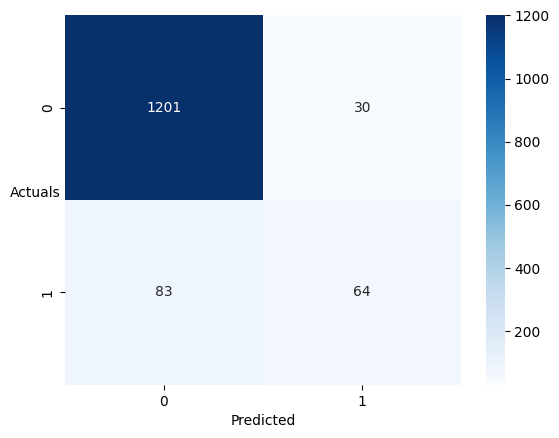

In [83]:
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [84]:

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

In [85]:


optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold



0.07669278006648413

In [86]:


# Validating on the train set wit revised Threshold

# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07669278006648413:
        a=1
    else:
        a=0
    y_pred.append(a)



              precision    recall  f1-score   support

         0.0      0.986     0.790     0.877      1231
         1.0      0.340     0.905     0.494       147

    accuracy                          0.803      1378
   macro avg      0.663     0.848     0.686      1378
weighted avg      0.917     0.803     0.837      1378



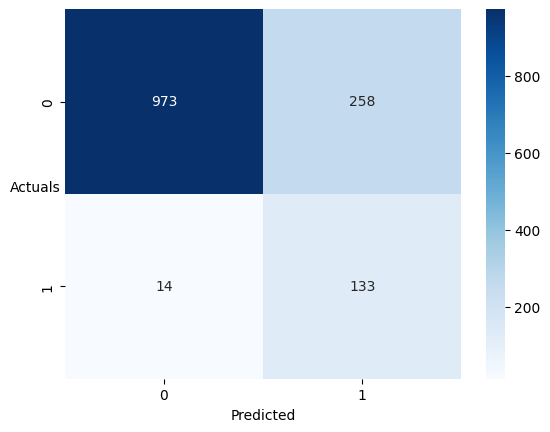

In [87]:

print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [88]:
y_prob_pred_test = model_2.predict(test_XY)

In [89]:


# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.07669278006648413:
        a=1
    else:
        a=0
    y_pred_test.append(a)



              precision    recall  f1-score   support

         0.0      0.978     0.801     0.880       607
         1.0      0.339     0.849     0.484        73

    accuracy                          0.806       680
   macro avg      0.658     0.825     0.682       680
weighted avg      0.909     0.806     0.838       680



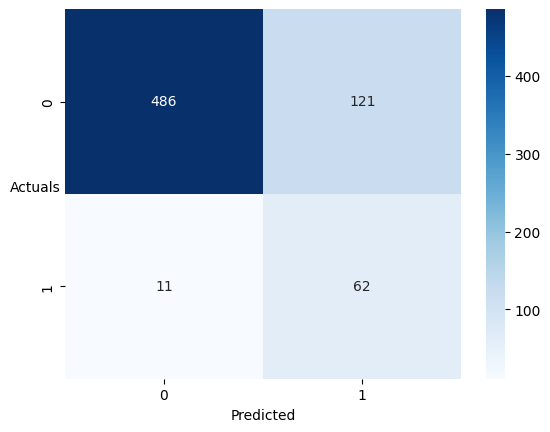

In [90]:
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=3))

sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [91]:
#lda and random forest


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier



In [92]:
X_train_dt= Company_imputed_Train.drop('Default',axis=1)
y_train_dt=Company_imputed_Train['Default']
X_test_dt= Company_imputed_Test.drop('Default',axis=1)
y_test_dt=Company_imputed_Test['Default']

In [93]:
#1.8) Build a RANDOM FOREST Model on Train dset

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}

rfcl=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [94]:
grid_search.fit(X_train_dt, y_train_dt) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [95]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 25}

In [96]:
best_grid=grid_search.best_estimator_

In [97]:


pred_train_rf=best_grid.predict(X_train_dt)
pred_test_rf=best_grid.predict(X_test_dt)



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1231
         1.0       0.86      0.40      0.55       147

    accuracy                           0.93      1378
   macro avg       0.89      0.70      0.75      1378
weighted avg       0.92      0.93      0.92      1378



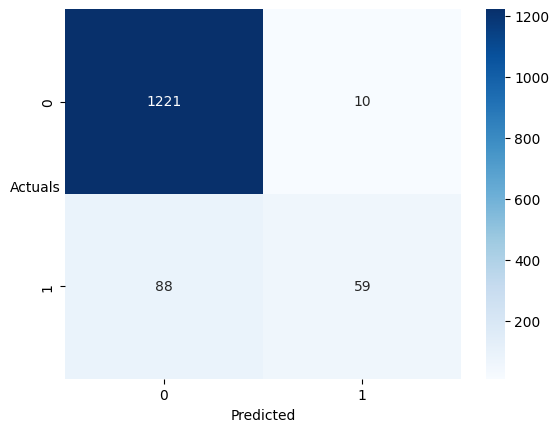

In [98]:
print(metrics.classification_report(y_train_dt,pred_train_rf))
sns.heatmap((metrics.confusion_matrix(y_train_dt,pred_train_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       607
         1.0       0.73      0.30      0.43        73

    accuracy                           0.91       680
   macro avg       0.83      0.64      0.69       680
weighted avg       0.90      0.91      0.90       680



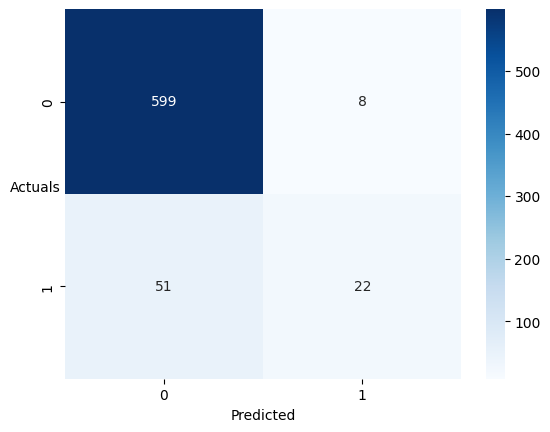

In [99]:


print(metrics.classification_report(y_test_dt,pred_test_rf))

sns.heatmap((metrics.confusion_matrix(y_test_dt,pred_test_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [100]:


# Validating on the train set 

# Prediction on the train set
pred_train_rf1=[]
for i in range(0,len(pred_train_rf)):
    if np.array(pred_train_rf)[i]>0.07669278006648413:
        a=1
    else:
        a=0
    pred_train_rf1.append(a)



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1231
         1.0       0.86      0.40      0.55       147

    accuracy                           0.93      1378
   macro avg       0.89      0.70      0.75      1378
weighted avg       0.92      0.93      0.92      1378



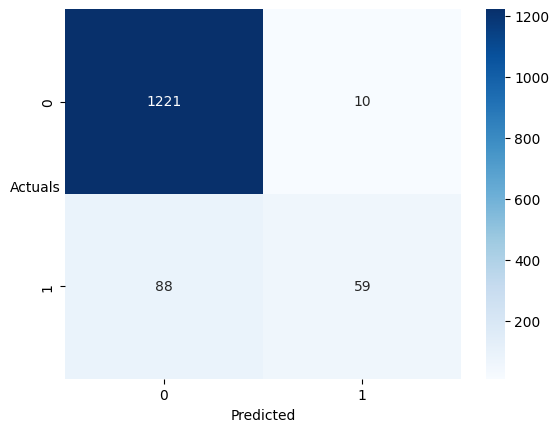

In [101]:
print(metrics.classification_report(y_train_dt,pred_train_rf1))
sns.heatmap((metrics.confusion_matrix(y_train_dt,pred_train_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [102]:


# Validating on the test set 

# Prediction on the test set
pred_test_rf1=[]
for i in range(0,len(pred_test_rf)):
    if np.array(pred_test_rf)[i]>0.07669278006648413:
        a=1
    else:
        a=0
    pred_test_rf1.append(a)



              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       607
         1.0       0.73      0.30      0.43        73

    accuracy                           0.91       680
   macro avg       0.83      0.64      0.69       680
weighted avg       0.90      0.91      0.90       680



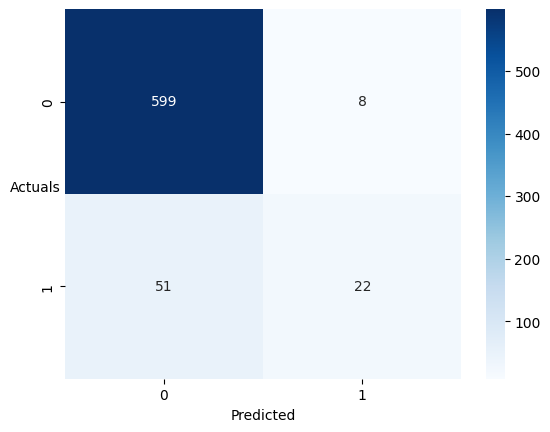

In [103]:

print(metrics.classification_report(y_test_dt,pred_test_rf1))
sns.heatmap((metrics.confusion_matrix(y_test_dt,pred_test_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



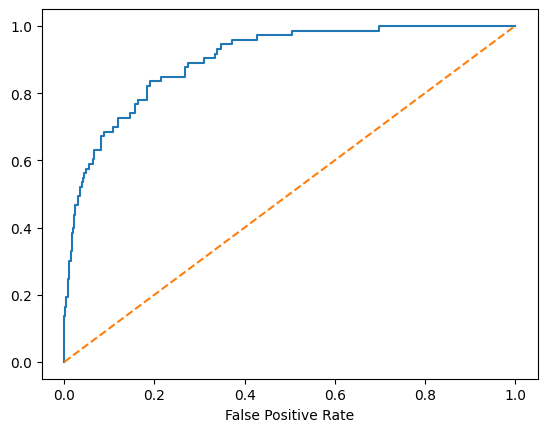

In [104]:


# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_test = best_grid.predict_proba(X_test_dt)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_dt, probs_test)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test_dt, probs_test)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');



In [105]:
LDA = LinearDiscriminantAnalysis()

In [106]:
lda_model=LDA.fit(X_train_dt,y_train_dt)

In [107]:


pred_train_lda = lda_model.predict(X_train_dt)
pred_test_lda = lda_model.predict(X_test_dt)



              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.60      0.54      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378



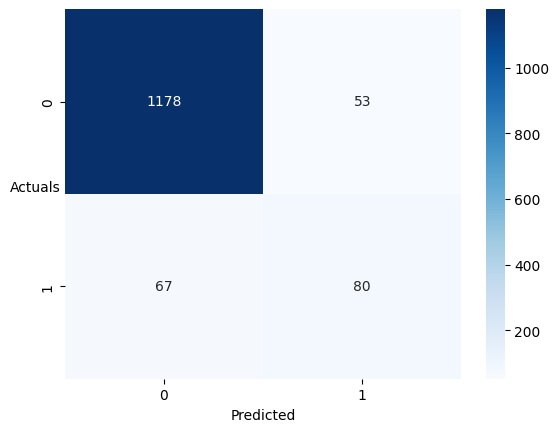

In [108]:
print(metrics.classification_report(y_train_dt,pred_train_lda))
sns.heatmap((metrics.confusion_matrix(y_train_dt,pred_train_lda)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       607
         1.0       0.49      0.47      0.48        73

    accuracy                           0.89       680
   macro avg       0.71      0.70      0.71       680
weighted avg       0.89      0.89      0.89       680



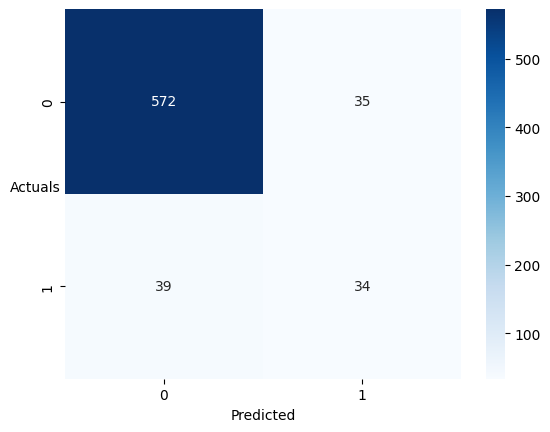

In [109]:


print(metrics.classification_report(y_test_dt,pred_test_lda)) 

sns.heatmap((metrics.confusion_matrix(y_test_dt,pred_test_lda)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

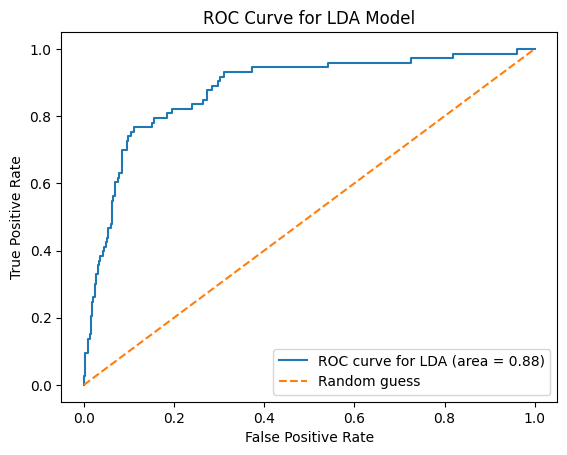

In [110]:


# ROC curve for lda_model
probs_test_lda = lda_model.predict_proba(X_test_dt)[:, 1] # Compute probabilities of positive class (class 1) for the test set
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_dt, probs_test_lda) # Compute the false positive rate, true positive rate, and threshold for the ROC curve
roc_auc_lda = roc_auc_score(y_test_dt, probs_test_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model')
plt.legend(loc="lower right")
plt.show()

